Importação das bibliotecas

In [ ]:
import pandas as pd
import matplotlib as plt

Gerando arquivos .xlsx

In [ ]:
df_nba = pd.read_excel('/DIO/NBA.xlsx')
df_nfl = pd.read_excel('/DIO/NFL.xlsx')
df_nhl = pd.read_excel('/DIO/NHL.xlsx')
df_mlb = pd.read_excel('/DIO/MLB.xlsx')
df_mls = pd.read_excel('/DIO/MLS.xlsx')

Concatenar arquivos

In [ ]:
df = pd.concat([df_nba, df_mlb, df_mls, df_nhl, df_nfl])

Localizar ',' e substituir por '.'

In [ ]:
df["Capacity "] = df["Capacity "].str.replace(',','.')

Alteração de 'str' para 'float'

In [ ]:
df["Capacity "] = df["Capacity "].astype(float)

Tipos de dados

In [ ]:
df.dtypes

Stadium       object
Capacity     float64
Location      object
Team          object
Opened         int64
League        object
dtype: object

Quantidade de registros por liga

In [ ]:
group_leagues = df.groupby(['League'])['League'].count()
group_leagues.head()

League
MLB    30
MLS    28
NBA    30
NFL    32
NHL    32
Name: League, dtype: int64

Quantidade de registros

In [ ]:
group_leagues = df.groupby(['League'])['League'].count().sum()
print(group_leagues)

152


Divisão por delimitador ','

In [ ]:
div = df['Location '].str.split(',')
div.head()

0              [Dallas,  Texas]
1           [Orlando,  Florida]
2         [San Antonio,  Texas]
3           [Denver,  Colorado]
4    [New York City,  New York]
Name: Location , dtype: object

Criação das novas colunas 'City' e 'State'

In [ ]:
City = div.str.get(0)
State = div.str.get(1)
df['City'] = City
df['State'] = State
df.head(100)

,Stadium,Capacity,Location,Team,Opened,League,City,State
0,American Airlines Center,19.200,"Dallas, Texas",Dallas Mavericks,2001,NBA,Dallas,Texas
1,Amway Center,18.846,"Orlando, Florida",Orlando Magic,2010,NBA,Orlando,Florida
2,AT&T Center,18.418,"San Antonio, Texas",San Antonio Spurs,2002,NBA,San Antonio,Texas
3,Ball Arena,19.520,"Denver, Colorado",Denver Nuggets,1999,NBA,Denver,Colorado
4,Barclays Center,17.732,"New York City, New York",Brooklyn Nets,2012,NBA,New York City,New York
...,...,...,...,...,...,...,...,...
7,Capital One Arena,18.506,"Washington, D.C.",Washington Capitals,1997,NHL,Washington,D.C.
8,Climate Pledge Arena,17.151,"Seattle, Washington",Seattle Kraken,1962,NHL,Seattle,Washington
9,Crypto.com Arena,18.230,"Los Angeles, California",Los Angeles Kings,1999,NHL,Los Angeles,California
10,Enterprise Center,18.096,"St. Louis, Missouri",St. Louis Blues,1994,NHL,St. Louis,Missouri


Remoção da coluna 'Location '

In [ ]:
df.drop(["Location "], axis=1, inplace=True)
df.head(100)

,Stadium,Capacity,Team,Opened,League,City,State
0,American Airlines Center,19.200,Dallas Mavericks,2001,NBA,Dallas,Texas
1,Amway Center,18.846,Orlando Magic,2010,NBA,Orlando,Florida
2,AT&T Center,18.418,San Antonio Spurs,2002,NBA,San Antonio,Texas
3,Ball Arena,19.520,Denver Nuggets,1999,NBA,Denver,Colorado
4,Barclays Center,17.732,Brooklyn Nets,2012,NBA,New York City,New York
...,...,...,...,...,...,...,...
7,Capital One Arena,18.506,Washington Capitals,1997,NHL,Washington,D.C.
8,Climate Pledge Arena,17.151,Seattle Kraken,1962,NHL,Seattle,Washington
9,Crypto.com Arena,18.230,Los Angeles Kings,1999,NHL,Los Angeles,California
10,Enterprise Center,18.096,St. Louis Blues,1994,NHL,St. Louis,Missouri


Tratamento de dados faltantes

In [ ]:
df['Capacity '].fillna(0,inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

Stadium      0
Capacity     0
Team         0
Opened       0
League       0
City         0
State        0
dtype: int64

In [ ]:
df.head(100)

,Stadium,Capacity,Team,Opened,League,City,State
0,American Airlines Center,19.200,Dallas Mavericks,2001,NBA,Dallas,Texas
1,Amway Center,18.846,Orlando Magic,2010,NBA,Orlando,Florida
2,AT&T Center,18.418,San Antonio Spurs,2002,NBA,San Antonio,Texas
3,Ball Arena,19.520,Denver Nuggets,1999,NBA,Denver,Colorado
4,Barclays Center,17.732,Brooklyn Nets,2012,NBA,New York City,New York
...,...,...,...,...,...,...,...
16,Madison Square Garden,18.006,New York Rangers,1968,NHL,New York City,New York
17,Nationwide Arena,18.144,Columbus Blue Jackets,2000,NHL,Columbus,Ohio
18,PNC Arena,18.680,Carolina Hurricanes,1999,NHL,Raleigh,North Carolina
19,PPG Paints Arena,18.387,Pittsburgh Penguins,2010,NHL,Pittsburgh,Pennsylvania


Quais são os 5 times que contém a maior capacidade em seus estádios?

In [ ]:
capacitymax = df.sort_values("Capacity ", ascending=False)
capacitymax.head(5)

,Stadium,Capacity,Team,Opened,League,City,State
20,MetLife Stadium,82.500,New York Giants,2010,NFL,East Rutherford,New Jersey
21,MetLife Stadium,82.500,New York Jets,2010,NFL,East Rutherford,New Jersey
6,FedExField,82.000,Washington Commanders,1997,NFL,Washington,D.C.
13,Lambeau Field,81.441,Green Bay Packers,1957,NFL,Green Bay,Wisconsin
2,AT&T Stadium,80.000,Dallas Cowboys,2009,NFL,Dallas,Texas


Qual é o time que contém maior capacidade de cada liga?

In [ ]:
leaguemax = df.groupby("League").max().sort_values("Capacity ", ascending=False)
print(leaguemax)

                   Stadium  Capacity                    Team  Opened   \
League                                                                  
NFL      U.S. Bank Stadium     82.500  Washington Commanders     2020   
MLB         loanDepot park     56.000   Washington Nationals     2020   
MLS         Yankee Stadium     38.000   Sporting Kansas City     2021   
NHL     Xcel Energy Center     21.105          Winnipeg Jets     2021   
NBA     Wells Fargo Center     20.917     Washington Wizards     2019   

              City        State  
League                           
NFL     Washington    Wisconsin  
MLB     Washington    Wisconsin  
MLS     Washington         Utah  
NHL       Winnipeg   Washington  
NBA     Washington    Wisconsin  


Quais são as 5 cidades que contém maior capacidade em seus estádios?



In [ ]:
citymax = df.groupby("City").sum().sort_values("Capacity ", ascending=False)
citymax.head(5)

,Capacity,Opened
City,,
Los Angeles,341.986,17961
Chicago,184.398,9817
Washington,182.201,10017
Denver,181.659,10001
Dallas,178.532,10036


Quais são as 5 estados que contém maior capacidade em seus estádios?

In [ ]:
statemax = df.groupby("State").sum().sort_values("Capacity ", ascending=False)
statemax.head(5)

,Capacity,Opened
State,,
California,610.016,33988
Florida,382.378,22022
Texas,349.131,20064
Pennsylvania,296.443,16021
Ohio,294.506,16032


Quais são os 5 times mais antigos das ligas?

In [ ]:
openedteam = df.groupby("Team").min().sort_values("Opened ", ascending=True)
print(openedteam)

                              Stadium  Capacity   Opened  League  \
Team                                                               
Boston Red Sox            Fenway Park     37.755     1912    MLB   
Chicago Cubs            Wrigley Field     41.649     1914    MLB   
Chicago Bears           Soldier Field     61.500     1924    NFL   
Portland Timbers      Providence Park     25.218     1926    MLS   
Green Bay Packers       Lambeau Field     81.441     1957    NFL   
...                               ...        ...      ...    ...   
Los Angeles Chargers     SoFi Stadium     70.000     2020    NFL   
New York Islanders          UBS Arena     17.113     2021    NHL   
Columbus Crew         Lower.com Field     20.371     2021    MLS   
Austin FC                  Q2 Stadium     20.738     2021    MLS   
FC Cincinnati             TQL Stadium     26.000     2021    MLS   

                               City           State  
Team                                                 
Boston 

Quais as cidades que contém maior quantidade de times?

In [ ]:
citycount = df['City'].value_counts(ascending=False)
citycount.head(5)

Los Angeles      9
Dallas           5
Philadelphia     5
Denver           5
New York City    5
Name: City, dtype: int64

Quais os estados que contém maior quantidade de times?

In [ ]:
statecount = df['State'].value_counts(ascending=False)
statecount.head(5)

 California      17
 Florida         11
 Texas           10
 New York         9
 Pennsylvania     8
Name: State, dtype: int64

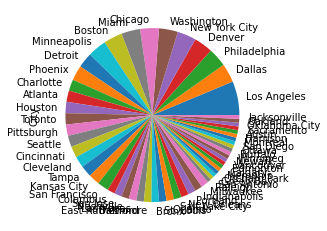

In [ ]:
citycount.plot.pie()

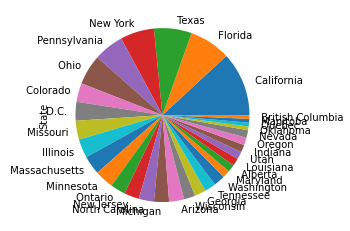

In [ ]:
statecount.plot.pie()

In [ ]:
df["Capacity "].describe()

count    143.000000
mean      35.791811
std       21.397871
min       15.321000
25%       18.503000
50%       20.738000
75%       48.167000
max       82.500000
Name: Capacity , dtype: float64

Qual a liga que contém maior capacidade em seus estádios?

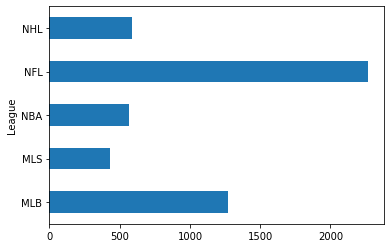

In [ ]:
leaguesum = df.groupby("League")['Capacity '].sum()
leaguesum.plot.barh()